## Metric

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import sys

sys.path.append('../bd_config')    
from db_query import get_data

In [2]:
df = get_data()

Conexión exitosa a la base de datos
Datos obtenidos exitosamente


In [4]:
df.head(10)

,id,year,social_support,gdp_per_capita,healthy_life_expectancy,freedom,generosity,government_corruption,continent_africa,continent_america,continent_asia,continent_europe,continent_oceania,happiness_score,predicted_happiness_score
0,1,2017,1.436338,1.416915,0.913476,0.505626,0.120573,0.163761,False,False,True,False,False,5.920,6.30629
1,2,2019,0.757000,0.274000,0.505000,0.142000,0.275000,0.078000,True,False,False,False,False,3.973,4.03493
2,3,2019,0.560000,0.191000,0.495000,0.443000,0.218000,0.089000,True,False,False,False,False,3.410,4.14127
3,4,2017,1.548969,0.786441,0.498273,0.658249,0.415984,0.246528,False,False,True,False,False,5.971,5.40629
4,5,2015,1.248230,1.053510,0.787230,0.449740,0.114510,0.084840,False,True,False,False,False,6.574,6.62809
5,6,2017,1.436338,1.416915,0.913476,0.505626,0.120573,0.163761,False,False,True,False,False,5.920,6.30629
6,7,2019,0.757000,0.274000,0.505000,0.142000,0.275000,0.078000,True,False,False,False,False,3.973,4.03493
7,8,2019,0.560000,0.191000,0.495000,0.443000,0.218000,0.089000,True,False,False,False,False,3.410,4.14127
8,9,2017,1.548969,0.786441,0.498273,0.658249,0.415984,0.246528,False,False,True,False,False,5.971,5.40629
9,10,2015,1.248230,1.053510,0.787230,0.449740,0.114510,0.084840,False,True,False,False,False,6.574,6.62809


In [5]:
y_test = df['happiness_score']
y_pred = df['predicted_happiness_score']

##### Coefficient of determination (R²)

In [7]:
r2_rf = r2_score(y_test, y_pred)

print("Random Forest Regression Model Results:")
print("Coefficient of determination (R^2):", r2_rf)

Random Forest Regression Model Results:
Coefficient of determination (R^2): 0.8709180118227431


The model demonstrates a notably high coefficient of determination, indicating that 87% of the variability in the Happiness Score is accounted for by the model.

##### Mean Squared Error

In [11]:
mse_rf = mean_squared_error(y_test, y_pred)

print("Random Forest Regression Model Results:")
print("Mean Squared Error (MSE):", mse_rf)

Random Forest Regression Model Results:
Mean Squared Error (MSE): 0.17818718986973522


An MSE of 0.1781 signifies that, on average, the model's predictions deviate from the actual values by 0.1781 squared units. A lower MSE indicates a smaller squared error, meaning the model's predictions are more accurate. Therefore, an MSE of 0.1781 suggests that the model's predictions are fairly accurate.

##### Mean Absolute Error

In [12]:
mae_rf = mean_absolute_error(y_test, y_pred)

print("Random Forest Regression Model Results:")
print("Mean Squared Error (MAE):", mae_rf)

Random Forest Regression Model Results:
Mean Squared Error (MAE): 0.3316266288207001


A Mean Absolute Error (MAE) of 0.3316 indicates that, on average, the predictions differ from the actual values by 0.3316 units. The MAE quantifies the average of the absolute differences between the model's predictions and the actual values. Unlike the Mean Squared Error (MSE), the MAE is less influenced by outliers because it does not square the errors.

It is evident that the MAE exceeds the MSE. This suggests that there are certain predictions that diverge notably from the actual values, leading to larger errors and consequently inflating the MAE. Nevertheless, on the whole, most predictions demonstrate high accuracy with minor deviations, thereby lowering the MSE.

We can see this, in the following graph:

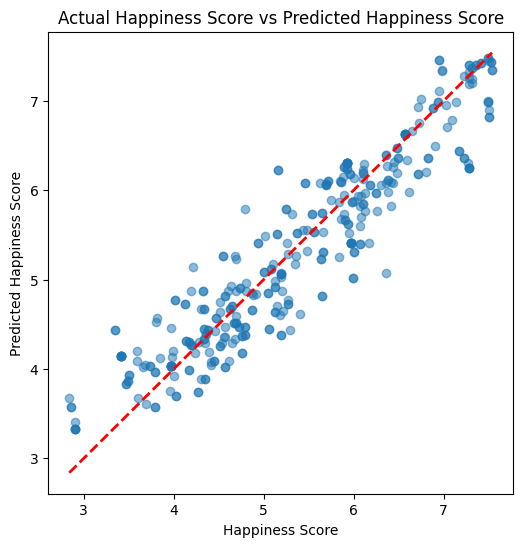

In [10]:
plt.figure(figsize=(6, 6))

plt.scatter(y_test, y_pred, alpha=0.5)

plt.xlabel("Happiness Score")
plt.ylabel("Predicted Happiness Score")

plt.title("Actual Happiness Score vs Predicted Happiness Score")

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.show()